# Communicate Data Findings

# Usage Distribution of Bike Rental  

## Investigation Overview 
I investigated the rental duration. I take a inspection look into the data and distribution. I obtain the relationship and trend in relationship with the key indidcator.   I obtain the result with visualization that shows the general and the outliner with the final goal of capture the best and wide usage of the bike for the location in various starting and ending station for the Lyft bike rental business. 

## Dataset Overview 
The data consisted of monthly rental data from  from 2019 to 2020 or more specifically from August of 2019 to April of 2020. The attributes included the user type, member gender, bike share for all trip, start time(month, hour), member birth year as well as additional measurements such as duration_sec, start_time,	end_time, start_station_id,	start_station_name,	start_station_latitude,	start_station_longitude,	end_station_id,	end_station_name,	end_station_latitude,	end_station_longitude,	bike_id	user_type	and bike_share_for_all_trip. 

With no information on how the station id is calculated by lattidue and longittude, we will be focusing on objectifing station. The data rows were cleaned from the analysis due to abnormality and missing information. Due to the fact that the station id is a good indicator for objectifing station.

In [59]:
# import library and error handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.simplefilter("ignore")

In [60]:
# load trip data accordingly
bike_rental_mon1 = pd.read_csv('./201908-baywheels-tripdata.csv')
bike_rental_mon2 = pd.read_csv('./201909-baywheels-tripdata.csv')
bike_rental_mon3 = pd.read_csv('./201910-baywheels-tripdata.csv')
bike_rental_mon4 = pd.read_csv('./201911-baywheels-tripdata.csv')
bike_rental_mon5 = pd.read_csv('./201912-baywheels-tripdata.csv')
bike_rental_mon6 = pd.read_csv('./202001-baywheels-tripdata.csv')
bike_rental_mon7 = pd.read_csv('./202002-baywheels-tripdata.csv')
bike_rental_mon8 = pd.read_csv('./202003-baywheels-tripdata.csv')
bike_rental_mon9 = pd.read_csv('./202004-baywheels-tripdata.csv')

In [61]:
# data unification
bike_rental = pd.concat([bike_rental_mon1, bike_rental_mon2, bike_rental_mon3, bike_rental_mon4, bike_rental_mon5, bike_rental_mon6,
                         bike_rental_mon7, bike_rental_mon8, bike_rental_mon9])

In [62]:
bike_rental.reset_index(drop=True, inplace=True)
bike_rental[bike_rental.duplicated()]

,bike_id,bike_share_for_all_trip,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,...,rideable_type,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
1794868,967152.0,NaN,184.0,NaN,NaN,NaN,37.294455,-121.852412,NaN,2020-03-01 16:02:12,...,NaN,NaN,NaN,NaN,37.291022,-121.849144,NaN,2020-03-01 15:59:07,NaN,Customer
1794873,967152.0,NaN,167.0,NaN,NaN,NaN,37.294452,-121.852453,NaN,2020-03-01 21:05:58,...,NaN,NaN,NaN,NaN,37.291145,-121.849215,NaN,2020-03-01 21:03:10,NaN,Customer
1794896,809335.0,NaN,515.0,NaN,NaN,NaN,37.305733,-121.898976,NaN,2020-03-01 16:26:40,...,NaN,NaN,NaN,NaN,37.293233,-121.881765,NaN,2020-03-01 16:18:04,NaN,Customer
1794907,967152.0,NaN,222.0,NaN,NaN,NaN,37.291026,-121.849131,NaN,2020-03-01 12:54:56,...,NaN,NaN,NaN,NaN,37.293674,-121.851900,NaN,2020-03-01 12:51:13,NaN,Customer
1794941,967152.0,NaN,197.0,NaN,NaN,NaN,37.291145,-121.849184,NaN,2020-03-01 16:50:03,...,NaN,NaN,NaN,NaN,37.294480,-121.852444,NaN,2020-03-01 16:46:45,NaN,Customer
1794948,435830.0,NaN,1115.0,NaN,NaN,NaN,37.322121,-121.828247,NaN,2020-03-01 16:03:43,...,NaN,NaN,NaN,NaN,37.294565,-121.876272,NaN,2020-03-01 15:45:08,NaN,Customer
1794954,791001.0,NaN,3175.0,NaN,NaN,NaN,37.280917,-121.950277,NaN,2020-03-01 20:40:42,...,NaN,NaN,NaN,NaN,37.294710,-121.932079,NaN,2020-03-01 19:47:47,NaN,Subscriber
1794974,692895.0,NaN,1418.0,NaN,NaN,NaN,37.304575,-121.894081,NaN,2020-03-01 16:03:36,...,NaN,NaN,NaN,NaN,37.295171,-121.885634,NaN,2020-03-01 15:39:57,NaN,Subscriber
1794999,622027.0,NaN,822.0,NaN,NaN,NaN,37.322071,-121.881226,NaN,2020-03-01 09:45:23,...,NaN,NaN,NaN,NaN,37.296794,-121.879718,NaN,2020-03-01 09:31:40,NaN,Subscriber
1795000,151897.0,NaN,1110.0,NaN,NaN,NaN,37.310912,-121.895277,NaN,2020-03-01 15:38:23,...,NaN,NaN,NaN,NaN,37.296809,-121.879752,NaN,2020-03-01 15:19:52,NaN,Customer


In [63]:
bike_rental_cut_duration_outliers = bike_rental.query('duration_sec < 300')
bike_rental_cut_duration_outliers.reset_index(drop=True, inplace=True)

## Distribution of Duration seconds 
Duration in seconds of the dataset is skewed. To correct this phenomemon, a logarithmic scaling is used in order to obtain the distribution of duration seconds with a normal distribution.

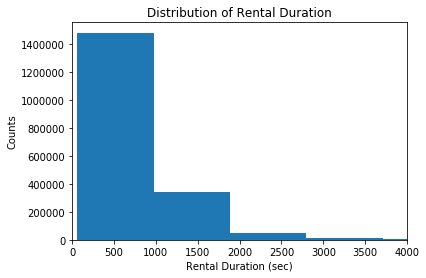

In [64]:
base_color = sns.color_palette()[0]
plt.hist(data=bike_rental, x='duration_sec', color=base_color, bins=1000)
plt.xlim(0, 4000)
plt.title('Distribution of Rental Duration')
plt.xlabel('Rental Duration (sec)')
plt.ylabel('Counts');

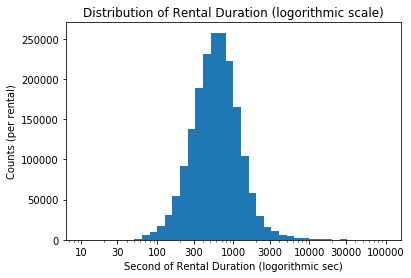

In [65]:
log_duration_bins = 10 ** np.arange(1, 5.0+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data=bike_rental, x='duration_sec', bins=log_duration_bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of Rental Duration (logorithmic scale)')
plt.xlabel('Second of Rental Duration (logorithmic sec)')
plt.ylabel('Counts (per rental)');

## Count vs. End Station ID
The plotting with count and end station id show that the bike rental outliner often occur if the end station is about 250 and 30 as they produce two peaks among all stations. There are extreme stations for rental business that has short rental duration.

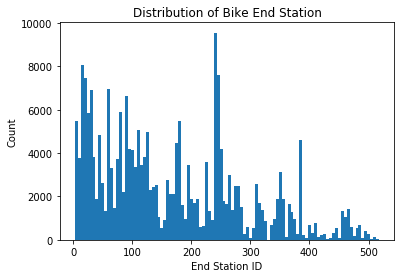

In [66]:
bike_bins = np.arange(bike_rental_cut_duration_outliers.end_station_id.min(), bike_rental_cut_duration_outliers.	end_station_id.max(), 5)

bike_rental_cut_duration_outliers = bike_rental.query('duration_sec < 300')
bike_rental_cut_duration_outliers.reset_index(drop=True, inplace=True)

plt.hist(data=bike_rental_cut_duration_outliers, x='end_station_id', bins=bike_bins);
plt.title('Distribution of Bike End Station')
plt.xlabel('End Station ID')
plt.ylabel('Count');

## Heatmap of Outliner has duration_sec < 300 sec

From the above, the results tell that bike id and duation, starting/end stationd id to starting/end station longitude are correlated in showing multiple of three appearent cluster groups comprise of the bike group, starting station group and ending station group.

This combination makes perfect sense, as each of this group is distinctive according to their statistical correlation significances.

It is also interesting note the station latitude is negatively correlated with the station longitutde.

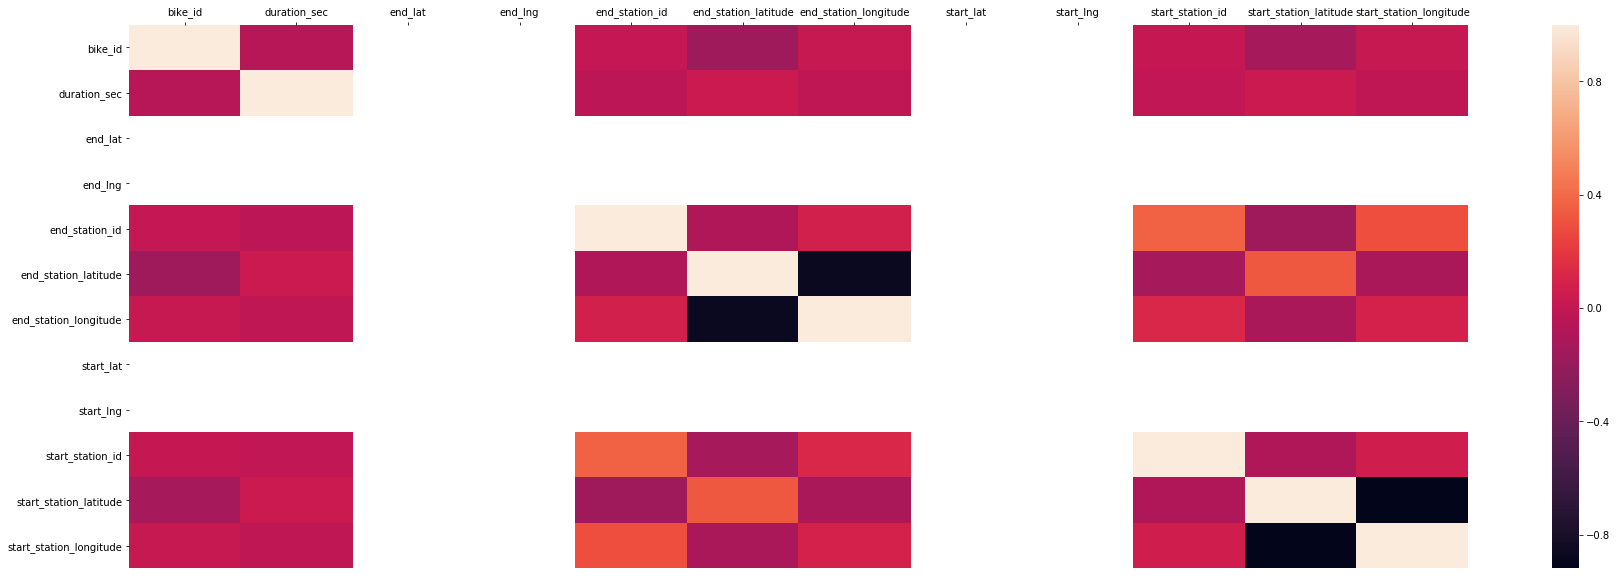

In [67]:
corrmat = bike_rental_cut_duration_outliers.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

## Bar Chart of Start Station ID
Start station with small id usually has bike rental with small duration in second.

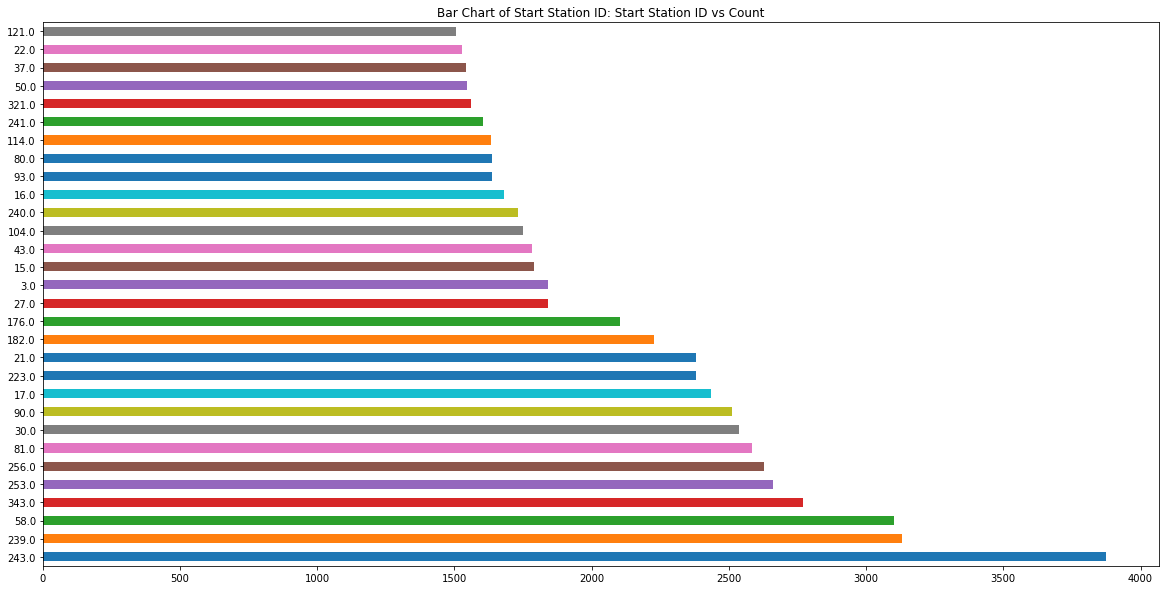

In [68]:
bike_rental_cut_duration_outliers['start_station_id'].value_counts().head(30).plot(kind='barh', figsize=(20,10))
plt.title('Bar Chart of Start Station ID: Start Station ID vs Count');

## Count vs. Start Station
Start station with small id usually has bike rental with small duration in second.

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


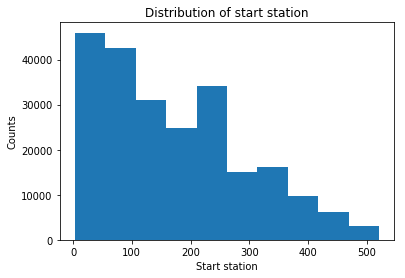

In [69]:
hour_bins = np.arange(0, 23+1, 1)
plt.hist(data=bike_rental_cut_duration_outliers, x='start_station_id', color=base_color)
plt.title('Distribution of start station')
plt.xlabel('Start station')
plt.ylabel('Counts');

## Duration seconds and Status of whether bike is shared for all trip or not
It shows that if the bike is not shared for all trip usually has higher duration in second for bike rental than those who shared bike for all trip ihn the data set.

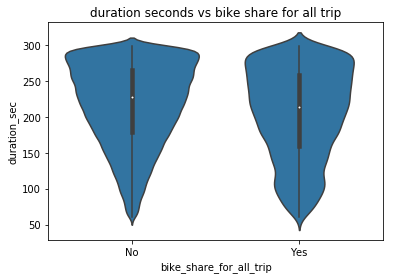

In [70]:
sns.violinplot(data=bike_rental_cut_duration_outliers, x='bike_share_for_all_trip', y='duration_sec', color=base_color)
plt.title('duration seconds vs bike share for all trip');

## Slide Creation

In [71]:
#Upon execution with the final line below will create the slide with arrow control for presenting pages to audiences on screen accordingly.

In [72]:
# Slide Desk Generation
!jupyter nbconvert "Bike_Rental_Explanation.ipynb" --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Bike_Rental_Explanation.ipynb to slides
[NbConvertApp] Writing 303699 bytes to Bike_Rental_Explanation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 9, in <module>
    sys.exit(main())
  File "C:\Users\User\Anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\User\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\User\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 338, in start
    self.convert_notebooks()
  File "C:\Users\User\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 508, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fi

## Thanks

In [73]:
#Last page of presentation.